In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('../data/output.csv', index_col=0)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.drop(columns=['year'])

df.head()

,Fecha,cod_ine,CCAA,Casos,Fallecidos,Recuperados,Casos Activos,million_pop,casos_1m,fallecidos_1m,recuperados_1m,casos_activos_1m
0,2020-02-20,4,Baleares,1.0,0.0,0.0,0.0,1.104479,0.905404,0.0,0.0,0.0
1,2020-02-20,5,Canarias,1.0,0.0,0.0,0.0,2.100306,0.476121,0.0,0.0,0.0
2,2020-02-21,4,Baleares,1.0,0.0,0.0,0.0,1.104479,0.905404,0.0,0.0,0.0
3,2020-02-21,5,Canarias,1.0,0.0,0.0,0.0,2.100306,0.476121,0.0,0.0,0.0
4,2020-02-22,4,Baleares,1.0,0.0,0.0,0.0,1.104479,0.905404,0.0,0.0,0.0


In [3]:
col = df.columns.tolist() + ['inc_casos', 'inc_casos_activos', 'inc_fallecidos','inc_recuperados','pct_casos_activos','pct_fallecidos','pct_recuperados','sma_5_casos']

df_final = pd.DataFrame(columns=col)


# Compute incremental per day and per community
# we need to calculate diff per community in df
for community in df['CCAA'].unique().tolist():
    temporal_df = df[df['CCAA'] == community]
    temporal_df['inc_casos'] = temporal_df['Casos'].diff()
    temporal_df['inc_casos_activos'] = temporal_df['Casos Activos'].diff()
    temporal_df['inc_fallecidos'] = temporal_df['Fallecidos'].diff()
    temporal_df['inc_recuperados'] = temporal_df['Recuperados'].diff()
    temporal_df['sma_5_casos'] = temporal_df['inc_casos'].rolling(window=5).mean()
    temporal_df['sma_7_casos'] = temporal_df['inc_casos'].rolling(window=7).mean()
    temporal_df['sma_10_casos'] = temporal_df['inc_casos'].rolling(window=10).mean()
    temporal_df['sma_5_fallecidos'] = temporal_df['inc_fallecidos'].rolling(window=5).mean()
    temporal_df['sma_7_fallecidos'] = temporal_df['inc_fallecidos'].rolling(window=7).mean()
    temporal_df['sma_10_fallecidos'] = temporal_df['inc_fallecidos'].rolling(window=10).mean()
    temporal_df['sma_5_recuperados'] = temporal_df['inc_recuperados'].rolling(window=5).mean()
    temporal_df['sma_7_recuperados'] = temporal_df['inc_recuperados'].rolling(window=7).mean()
    temporal_df['sma_10_recuperados'] = temporal_df['inc_recuperados'].rolling(window=10).mean()
        
    df_final = df_final.append(temporal_df, ignore_index=True, sort=True)

    
for com in ['Madrid', 'Cataluña', 'Andalucía']:    
    df_final[df_final['CCAA'] == com].plot(x='Fecha', y=['sma_5_casos', 'sma_7_casos', 'sma_10_casos'], 
                                           title='Moving averages for {}'.format(com), figsize=(15,5))

In [4]:
df_final.shape

(982, 28)

In [5]:
df_rt = pd.read_csv('../data/rt.csv')
df_final.CCAA.unique(), df_rt.state.unique(), df_rt.head()

(array(['Baleares', 'Canarias', 'Cataluña', 'C. Valenciana', 'Madrid',
        'Andalucía', 'Castilla y León', 'País Vasco', 'Asturias',
        'Cantabria', 'Castilla La Mancha', 'Extremadura', 'Navarra',
        'La Rioja', 'Galicia', 'Aragón', 'Murcia', 'Melilla', 'Ceuta'],
       dtype=object),
 array(['AN', 'AR', 'AS', 'CB', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA', 'IB',
        'MC', 'MD', 'NC', 'PV', 'RI', 'VC'], dtype=object),
   state        date    ML  Low_90  High_90  Low_50  High_50
 0    AN  2020-03-07  3.00    1.01     6.99    2.04     4.45
 1    AN  2020-03-08  4.11    2.05     6.32    3.34     5.14
 2    AN  2020-03-09  3.64    2.13     5.18    3.10     4.37
 3    AN  2020-03-10  3.80    2.61     5.01    3.36     4.35
 4    AN  2020-03-11  3.57    2.63     4.57    3.24     4.04)

In [6]:
community_map = {
    'AN': 'Andalucía',
    'AR': 'Aragón',
    'AS': 'Asturias',
    'CB': 'Cantabria',
    'CL': 'Castilla y León',
    'CM': 'Castilla La Mancha',
    'CN': 'Canarias',
    'CT': 'Cataluña',
    'EX': 'Extemadura',
    'GA': 'Galicia',
    'IB': 'Baleares',
    'MC': 'Murcia',
    'MD': 'Madrid',
    'NC': 'Navarra',
    'PV': 'País Vasco',
    'RI': 'La Rioja',
    'VC': 'C. Valenciana'
}

df_rt['state'] = df_rt['state'].map(community_map)
df_rt['date'] = pd.to_datetime(df_rt['date'])
df_rt.head()

,state,date,ML,Low_90,High_90,Low_50,High_50
0,Andalucía,2020-03-07,3.00,1.01,6.99,2.04,4.45
1,Andalucía,2020-03-08,4.11,2.05,6.32,3.34,5.14
2,Andalucía,2020-03-09,3.64,2.13,5.18,3.10,4.37
3,Andalucía,2020-03-10,3.80,2.61,5.01,3.36,4.35
4,Andalucía,2020-03-11,3.57,2.63,4.57,3.24,4.04


In [7]:
new_df = pd.merge(df_final, df_rt, how='left', left_on=['Fecha', 'CCAA'], right_on=['date', 'state'])
new_df.head()

,CCAA,Casos,Casos Activos,Fallecidos,Fecha,Recuperados,casos_1m,casos_activos_1m,cod_ine,fallecidos_1m,...,sma_7_casos,sma_7_fallecidos,sma_7_recuperados,state,date,ML,Low_90,High_90,Low_50,High_50
0,Baleares,1.0,0.0,0.0,2020-02-20,0.0,0.905404,0.0,4,0.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Baleares,1.0,0.0,0.0,2020-02-21,0.0,0.905404,0.0,4,0.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,Baleares,1.0,0.0,0.0,2020-02-22,0.0,0.905404,0.0,4,0.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,Baleares,1.0,0.0,0.0,2020-02-23,0.0,0.905404,0.0,4,0.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,Baleares,1.0,0.0,0.0,2020-02-24,0.0,0.905404,0.0,4,0.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


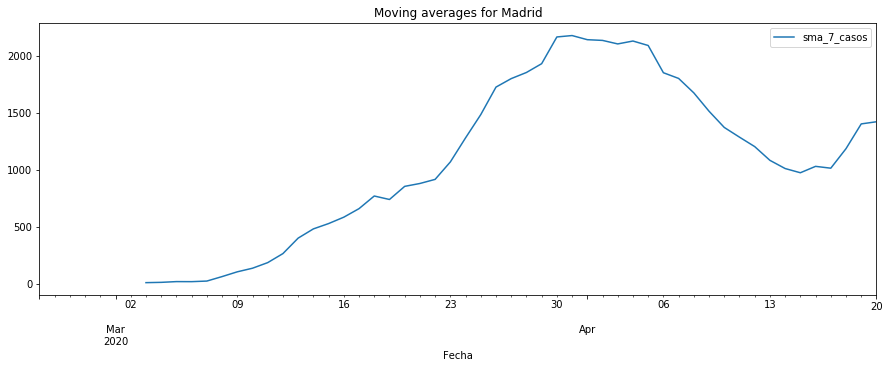

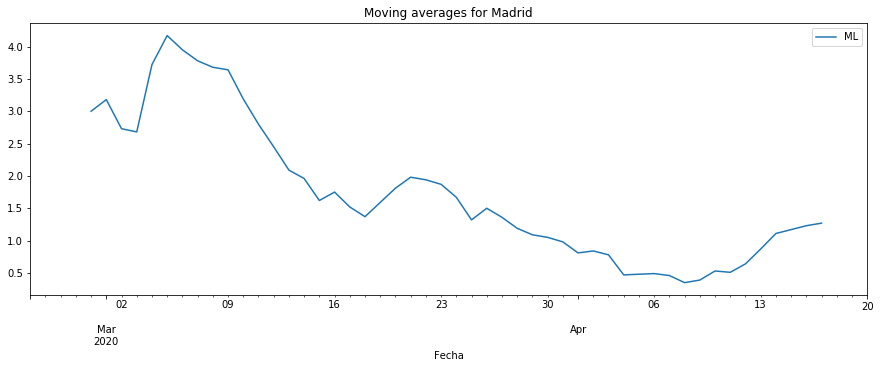

In [8]:
new_df[new_df['CCAA'] == 'Madrid'].plot(x='Fecha', y='sma_7_casos', 
                                           title='Moving averages for Madrid', figsize=(15,5))

new_df[new_df['CCAA'] == 'Madrid'].plot(x='Fecha', y='ML', 
                                           title='Moving averages for Madrid', figsize=(15,5))

In [9]:
# date related features
new_df['cancelled_flights_italy'] = (new_df['Fecha'] > datetime(2020, 3, 9))*1
new_df['estado_alarma'] = (new_df['Fecha'] > datetime(2020, 3, 13))*1
new_df['confinamiento_estricto'] = (new_df['Fecha'] > datetime(2020, 3, 27))*1
new_df['semana_santa'] = ((new_df['Fecha'] > datetime(2020, 4, 6)) & (new_df['Fecha'] < datetime(2020, 4, 12)))*1
new_df['weekday'] = new_df['Fecha'].dt.weekday

new_df = new_df.replace(np.inf, 0)
new_df = new_df.fillna(0)

new_df.head()

,CCAA,Casos,Casos Activos,Fallecidos,Fecha,Recuperados,casos_1m,casos_activos_1m,cod_ine,fallecidos_1m,...,ML,Low_90,High_90,Low_50,High_50,cancelled_flights_italy,estado_alarma,confinamiento_estricto,semana_santa,weekday
0,Baleares,1.0,0.0,0.0,2020-02-20,0.0,0.905404,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3
1,Baleares,1.0,0.0,0.0,2020-02-21,0.0,0.905404,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,4
2,Baleares,1.0,0.0,0.0,2020-02-22,0.0,0.905404,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,5
3,Baleares,1.0,0.0,0.0,2020-02-23,0.0,0.905404,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,6
4,Baleares,1.0,0.0,0.0,2020-02-24,0.0,0.905404,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [10]:
new_df.to_csv('../data/feature_engineering.csv', header=True)